In [1]:
# Importing of all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from ipywidgets import widgets, interactive
from sklearn.ensemble import RandomForestRegressor

url = "https://raw.githubusercontent.com/ryanayip/YipCapstoneNotebook/master/moviescleaned.csv"
df = pd.read_csv(url)

# Data Visualizations

Below we have 3 data visualizations for data exploration and inspection. These visualizations help to analyze the potential relationships between the gross revenue and our variables: genre, budget, and actor.

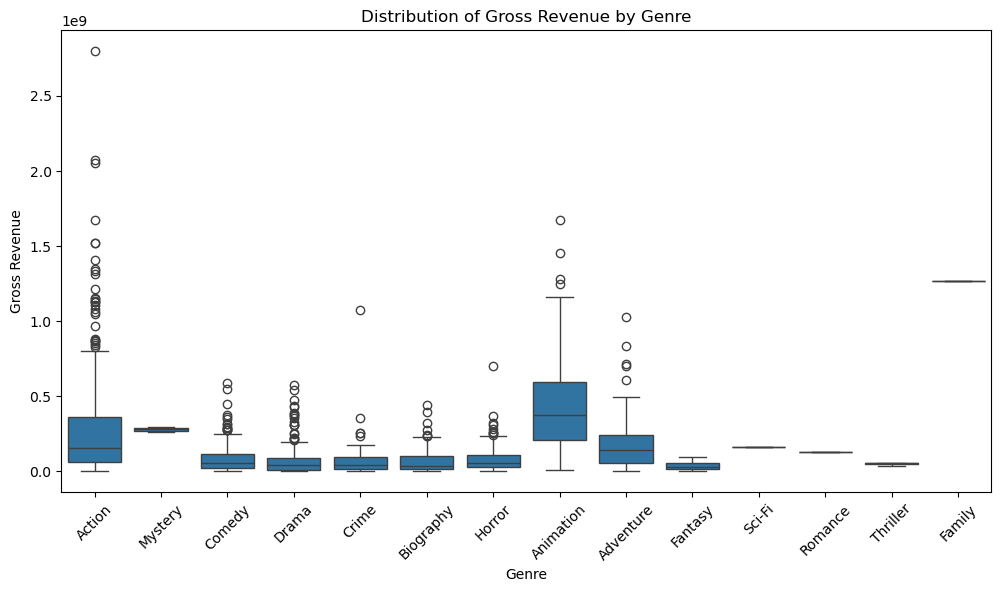

In [2]:
# Box plot of revenue by genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='gross', data=df)
plt.title('Distribution of Gross Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Gross Revenue')
plt.xticks(rotation=45)  
plt.show()


This box plot above shows which genres generate the most revenue along with any outliers.

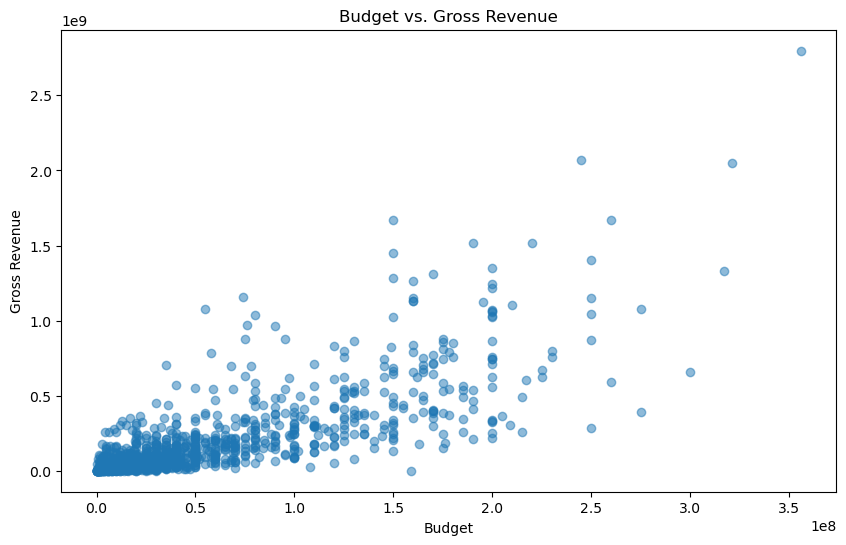

In [3]:
# Scatter plot of budget vs. gross
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['gross'], alpha=0.5)
plt.title('Budget vs. Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.show()

The scatter plot above demonstrates the relationship between the budget of the movie compared to how much gross revenue was generated.

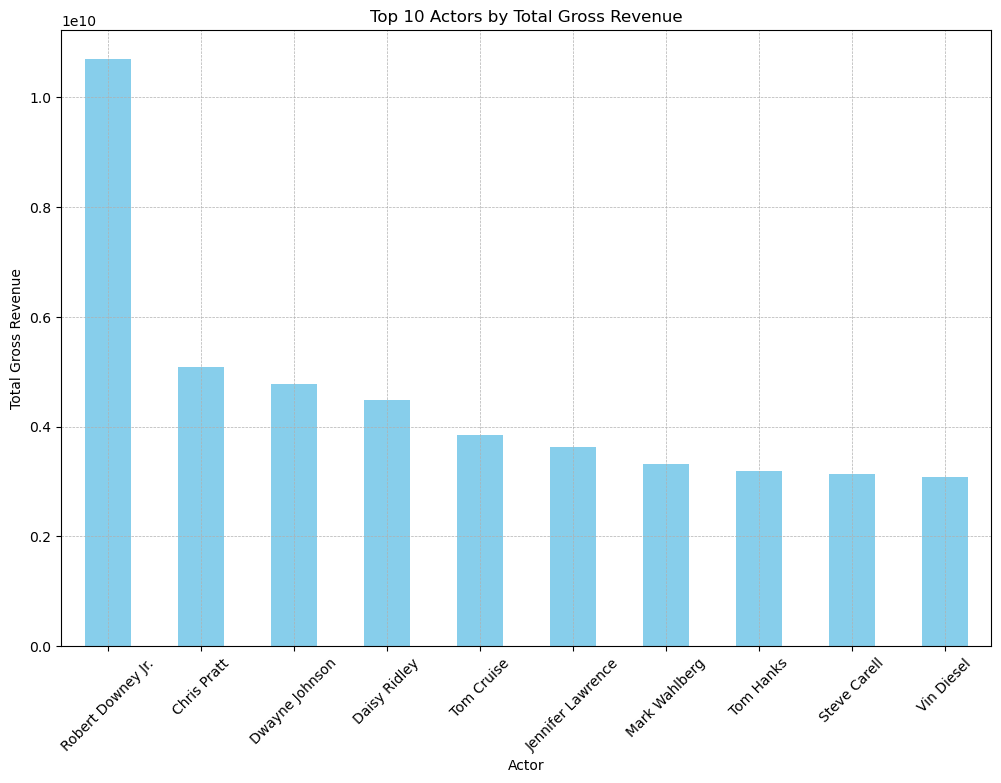

In [4]:
# Bar chart of top 10 actors by highest revenue
actor_revenue = df.groupby('star')['gross'].sum().sort_values(ascending=False)
top_actors = actor_revenue.head(10)
plt.figure(figsize=(12, 8))
top_actors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Actors by Total Gross Revenue')
plt.xlabel('Actor')
plt.ylabel('Total Gross Revenue')
plt.xticks(rotation=45)  # Rotates labels to reduce overlap
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

The bar chart above shows the top 10 highest revenue generating actors along with the total gross revenue they've generated.

# Data Training and Model Creation

In [5]:
# Preprocessing for categorical data
categorical_features = ['genre', 'star']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Creating pipeline for preprocessing and training
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestRegressor(n_estimators=100, random_state=0))
])
# Splitting data into training and testing
X = df[['genre', 'star', 'budget']]
y = df['gross']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training model
model.fit(X_train, y_train)

# Predictions and evaluations 
y_pred = model.predict(X_test)
print('R-Squared score: %.2f' % r2_score(y_test, y_pred))

R-Squared score: 0.64


R-Squared score was calculated above to indicate how well our variables explain the variance in revenue.

# Movie Revenue Prediction Generator

In [6]:
# Prediction Function
def predict_revenue(genre, star, budget):
    # Prepare a single input for prediction
    input_data = pd.DataFrame([[genre, star, budget]], columns=['genre', 'star', 'budget'])
    
    # Transform the input data
    input_preprocessed = model.named_steps['preprocessor'].transform(input_data)
    
    # Predict the gross revenue
    predicted_revenue = model.named_steps['classifier'].predict(input_preprocessed)
    
    # Display the result
    print(f"Predicted Revenue: ${predicted_revenue[0]:,.2f}")


# Widgets for variables
genre_widget = widgets.Dropdown(
    options=df['genre'].unique().tolist(),
    description='Genre:'
)

star_widget = widgets.Dropdown(
    options=df['star'].unique().tolist(),
    description='Star:'
)

budget_widget = widgets.IntSlider(
    min=int(df['budget'].min()), 
    max=int(df['budget'].max()), 
    step=100000, 
    description='Budget:'
)

interactive_plot = interactive(
    predict_revenue, 
    genre=genre_widget, 
    star=star_widget, 
    budget=budget_widget
)

# Display the interactive widgets
display(interactive_plot)

interactive(children=(Dropdown(description='Genre:', options=('Action', 'Mystery', 'Comedy', 'Drama', 'Crime',…